In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
suv_data = pd.read_csv("suv_data.csv",encoding="latin1")

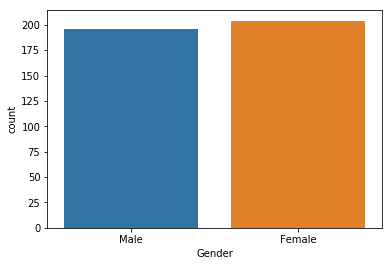

In [3]:
sns.countplot('Gender', data=suv_data)

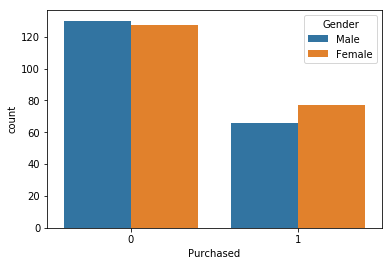

In [4]:
sns.countplot('Purchased', hue='Gender', data=suv_data)

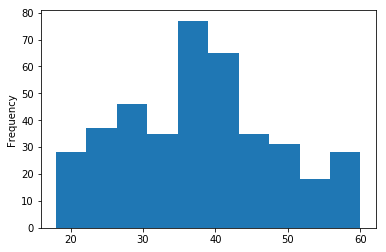

In [5]:
suv_data['Age'].plot.hist()

In [6]:
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
suv_data.drop('User ID', inplace=True, axis=1)

In [8]:
suv_data.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [9]:
gender = pd.get_dummies(suv_data['Gender'], drop_first=True)
gender.head(10)

,Male
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [10]:
suv_data = pd.concat([suv_data,gender], axis=1)
suv_data.head(10)

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1
5,Male,27,58000,0,1
6,Female,27,84000,0,0
7,Female,32,150000,1,0
8,Male,25,33000,0,1
9,Female,35,65000,0,0


In [11]:
suv_data.drop('Gender', axis=1, inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [15]:
x = suv_data.drop('Purchased', axis=1)
y = suv_data['Purchased']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [20]:
log_model = LogisticRegression(solver='lbfgs')
log_model.fit(x_train, y_train)
predictions = log_model.predict(x_test)

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [22]:
confusion_matrix(y_test, predictions)

array([[64,  4],
       [ 5, 27]], dtype=int64)

In [23]:
accuracy_score(y_test, predictions) * 100

91.0